### Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [5]:
cash=pd.read_csv('extract - cash request - data analyst.csv')
fees=pd.read_csv('extract - fees - data analyst - .csv')

In [6]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [7]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [8]:
cash.shape

(23970, 16)

In [9]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [10]:
cash.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [11]:
cash["status"].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [12]:
fees.shape

(21061, 13)

In [13]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [14]:
fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [15]:
fees["total_amount"].value_counts()

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64

In [16]:
fees[ fees["total_amount"]==10]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
20604,15552,22799.0,instant_payment,accepted,NaN,10.0,Instant Payment Cash Request 22799,2020-10-21 13:01:52.493241+00,2021-01-21 15:42:51.372269+00,2020-10-30 00:18:41+00,NaN,NaN,after


In [17]:
fees=fees[ fees["total_amount"]!=10]  # Eliminamos el registro porque es un outsider
fees["total_amount"].value_counts()

total_amount
5.0    21060
Name: count, dtype: int64

In [18]:
cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [19]:
fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18864
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13294
to_date            13294
charge_moment          0
dtype: int64

In [20]:
fees[fees["type"]=='postpone']  # From_date y to_date solo tiene valor con type='postpone'

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
11,15434,21897.0,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00,2020-10-21 09:00:21.619504+00,2020-10-21 09:00:25.398771+00,2020-10-26 22:00:00+00,2020-10-30 23:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
17,13949,19876.0,postpone,accepted,NaN,5.0,Postpone Cash Request 19876,2020-10-16 08:34:39.39839+00,2020-10-16 08:34:39.398412+00,2020-10-16 08:34:43.529531+00,2020-10-23 13:25:59.902+00,2020-11-03 23:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,411,3891.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3891,2020-06-22 08:24:47.439636+00,2021-01-20 14:46:09.980392+00,NaN,2020-07-03 22:00:00+00,2020-07-18 22:00:00+00,before
20597,1022,2717.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2717,2020-07-04 10:05:48.68153+00,2021-01-20 16:59:23.745182+00,2020-07-04 10:05:52+00,2020-07-07 22:00:00+00,2020-08-04 22:00:00+00,before
20605,681,3716.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3716,2020-06-26 15:13:10.276716+00,2021-01-21 15:47:52.053382+00,2020-06-26 15:13:45+00,2020-07-20 22:00:00+00,2020-08-04 22:00:00+00,before
20607,4561,10801.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10801,2020-08-21 11:28:54.470364+00,2021-01-21 16:54:46.995586+00,2020-08-21 11:29:00+00,2020-09-08 10:00:00+00,2020-10-07 10:00:00+00,before


# CASH

In [21]:
cash.dtypes

id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
dtype: object

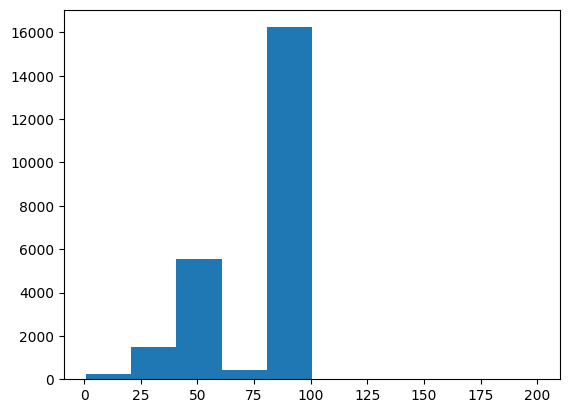

In [22]:
plt.hist(cash["amount"])
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

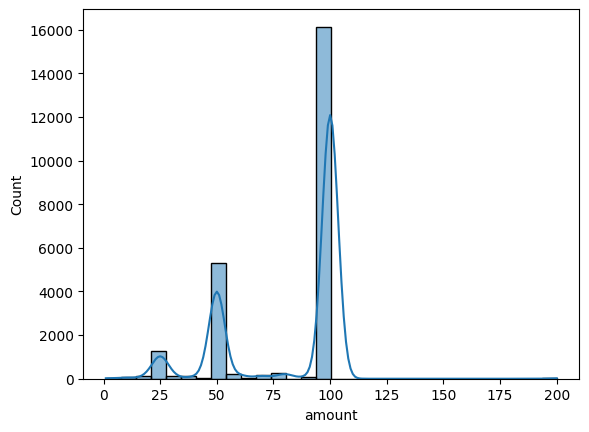

In [23]:
sns.histplot(cash["amount"],bins=30,kde=True )  # Hay que limpiar outsiders

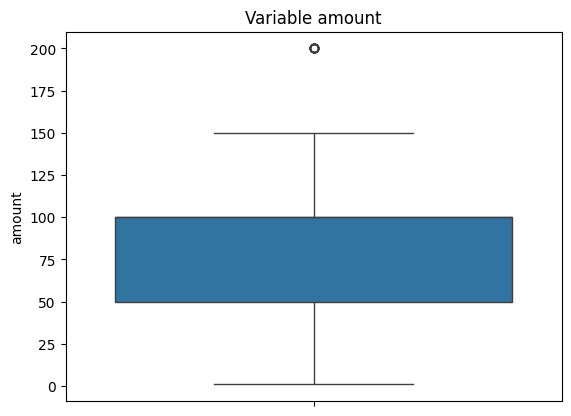

In [110]:
sns.boxplot(cash["amount"])
plt.title("Variable amount")
plt.show()

In [25]:
cash["amount"].value_counts().sort_index()  # hacer 3 categorias?

amount
1.0         19
2.0          3
5.0          6
8.0          1
10.0        57
11.0         2
15.0        10
20.0       132
22.0         2
24.0         1
25.0      1276
28.0         2
30.0       114
31.0         1
35.0         9
36.0         1
39.0         1
40.0       100
45.0        15
49.0         1
50.0      5304
54.0         1
55.0        14
60.0       190
65.0        12
67.0         1
70.0       151
72.0         1
75.0        18
80.0       267
85.0         9
86.0         1
90.0        91
94.0         1
95.0        21
97.0         1
98.0         2
99.0        12
100.0    16094
150.0        1
200.0       25
Name: count, dtype: int64

## Fees

In [26]:
fees.describe()

,id,cash_request_id,total_amount
count,21060.000000,21056.000000,21060.0
mean,10645.122127,16318.141385,5.0
std,6099.366349,6656.158172,0.0
min,1.000000,1456.000000,5.0
25%,5384.750000,11744.750000,5.0
50%,10651.500000,17158.500000,5.0
75%,15925.250000,21795.250000,5.0
max,21193.000000,27010.000000,5.0


## Limpieza

In [27]:
cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [28]:
cash[cash["user_id"].isnull()]  # miramos user_id nulls

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [29]:
cash[cash["user_id"].isnull()]['status'].unique()  # miramos los valores unicos de status para ver los valores

array(['rejected', 'canceled', 'money_back', 'direct_debit_rejected'],
      dtype=object)

In [30]:
cash.shape

(23970, 16)

In [31]:
2103/23970*100

8.773466833541928

En este proyecto, realizarás un análisis de cohortes exhaustivo basado en datos proporcionados por IronHack Payments. El objetivo principal es analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. Seguirás la evolución mensual de las métricas clave para estas cohortes, lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.

In [32]:
cash=cash.dropna(subset=["user_id"])   #Eliminamos los user_id null porque no podemos saber a que usuario pertenecen y por lo tanto no los podremos agrupar en ninguna cohorte


In [33]:
cash.isnull().sum()  # Comprobamos nulls de cash para ver si hay que limpiar mas nulls, los que quedan nos parecen lógicos por el tipo de dato y pasamos a mirar fees

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                           0
moderated_at                   7758
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     6276
money_back_date                6026
transfer_type                     0
send_at                        6325
recovery_status               18727
reco_creation                 18727
reco_last_update              18727
dtype: int64

In [34]:
fees.isnull().sum() # Comprobamos nulls de fees

id                     0
cash_request_id        4
type                   0
status                 0
category           18864
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13294
to_date            13294
charge_moment          0
dtype: int64

In [35]:
fees[fees["cash_request_id"].isnull()] # vemos que hay cash_request_id con null

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


#### Sustituimos los cash_request_id nulos por el valor del id que recuperamos de la columna reason

In [36]:
fees["reason"].unique()

array(['Instant Payment Cash Request 14941', 'rejected direct debit',
       'Instant Payment Cash Request 23371', ...,
       'Instant Payment Cash Request 25331',
       'Instant Payment Cash Request 23628',
       'Instant Payment Cash Request 20982'], dtype=object)

In [37]:
dFee=fees[fees["cash_request_id"].isnull()]['reason'].str.split() #vemos como extraer el id de reason
dFee.iloc[3]#[-1]
dFee


1911     [Instant, Payment, Cash, Request, 11164]
1960     [Instant, Payment, Cash, Request, 11444]
4605     [Instant, Payment, Cash, Request, 11788]
11870    [Instant, Payment, Cash, Request, 12212]
Name: reason, dtype: object

In [38]:
fees['cash_request_id'] = fees.apply(lambda x: x['reason'].split()[-1] if pd.isnull(x['cash_request_id']) else x['cash_request_id'], axis=1) #sustituimos el valor

In [39]:
fees[fees["id"]==11870] #comprobamos que ha hecho la sustitucion

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
20264,11870,19802.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 19802,2020-10-08 08:35:36.086992+00,2020-10-13 14:25:10.149713+00,2020-11-02 19:42:16.35266+00,NaN,NaN,after


In [40]:
fees.isnull().sum()  # Comprobamos nulls de fees para ver si hay que limpiar mas nulls, los que quedan nos parecen lógicos por el tipo de dato

id                     0
cash_request_id        0
type                   0
status                 0
category           18864
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13294
to_date            13294
charge_moment          0
dtype: int64

In [41]:
cash.sort_values(by='created_at')

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,NaN,regular,NaN,pending,2020-03-20 14:12:53.208246+00,2020-12-18 22:47:48.00885+00
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7824,9,100.0,money_back,2019-12-10 19:14:41.668754+00,2020-11-04 12:55:30.918436+00,430.0,2019-12-11 09:50:51+00,NaN,2020-01-08 23:00:00+00,2019-12-11,2020-05-12 11:05:30+00,regular,NaN,completed,2020-03-20 14:12:53.263164+00,2020-05-12 14:20:09.505802+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00,2020-12-18 13:11:35.051472+00,55916.0,NaN,NaN,2020-11-12 22:00:00+00,2020-11-02,2020-11-12 19:39:20.24198+00,instant,2020-11-01 23:08:07.41416+00,NaN,NaN,NaN
21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00,2020-12-18 13:13:10.258884+00,39339.0,NaN,NaN,2020-11-29 11:00:00+00,2020-11-02,2020-11-29 19:27:43.055298+00,instant,2020-11-01 23:12:16.335916+00,NaN,NaN,NaN
7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00,2020-11-02 09:06:37.169489+00,24505.0,2020-11-02 09:06:37.162733+00,NaN,2020-11-24 23:51:00+00,NaN,NaN,instant,2020-11-01 23:13:28.791529+00,NaN,NaN,NaN
14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00,2020-12-18 13:10:18.00419+00,100781.0,NaN,NaN,2020-12-04 11:00:00+00,NaN,2020-12-02 14:17:37.43354+00,instant,2020-11-01 23:16:12.720278+00,NaN,NaN,NaN


In [42]:
cash["created_at"]=pd.to_datetime(cash["created_at"])
cash['created_at_moth']=cash["created_at"].dt.month

In [43]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21867 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          21867 non-null  int64              
 1   amount                      21867 non-null  float64            
 2   status                      21867 non-null  object             
 3   created_at                  21867 non-null  datetime64[ns, UTC]
 4   updated_at                  21867 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                14109 non-null  object             
 7   deleted_account_id          1 non-null      float64            
 8   reimbursement_date          21867 non-null  object             
 9   cash_request_received_date  15591 non-null  object             
 10  money_back_date             15841 non-null  object             

In [44]:
# TODO vigilar cuantos usuarios quedan en las cohoorte de los meses de noviembre

In [45]:
fees["cash_request_id"].value_counts()

cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
21858.0     1
24479.0     1
24822.0     1
26203.0     1
25331.0     1
Name: count, Length: 12936, dtype: int64

In [46]:
fees[fees['cash_request_id']==12225.0].sort_values('created_at')

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
8764,4668,12225.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 12225,2020-08-21 12:42:29.814857+00,2020-10-13 14:25:01.92503+00,2020-10-02 11:27:24.787458+00,NaN,NaN,after
17389,5315,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:48:23.860125+00,2020-10-13 14:25:17.268587+00,NaN,2020-09-02 22:00:00+00,2020-09-25 22:00:00+00,after
17390,5316,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:48:58.870508+00,2020-10-13 14:25:17.269803+00,NaN,2020-09-02 22:00:00+00,2020-09-25 22:00:00+00,after
17391,5317,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:49:41.891044+00,2020-10-13 14:25:17.270848+00,NaN,2020-09-02 22:00:00+00,2020-09-24 22:00:00+00,after
17392,5318,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:50:06.050797+00,2020-10-13 14:25:17.272012+00,NaN,2020-09-02 22:00:00+00,2020-09-10 20:49:59.339+00,after
17381,5319,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:50:23.44063+00,2020-10-13 14:25:17.256643+00,NaN,2020-09-02 22:00:00+00,2020-09-25 22:00:00+00,after
17393,5320,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:01.792873+00,2020-10-13 14:25:17.273054+00,NaN,2020-09-02 22:00:00+00,2020-09-25 22:00:00+00,after
17394,5321,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:21.571977+00,2020-10-13 14:25:17.274093+00,NaN,2020-09-02 22:00:00+00,2020-09-25 22:00:00+00,after
17395,5322,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:50.495341+00,2020-10-13 14:25:17.275104+00,NaN,2020-09-02 22:00:00+00,2020-09-20 22:00:00+00,after
17396,5323,12225.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:52:39.702054+00,2020-10-13 14:25:17.27613+00,NaN,2020-09-02 22:00:00+00,2020-09-24 22:00:00+00,after


In [47]:
cash["user_id"].value_counts()

user_id
3377.0     19
2142.0     18
13851.0    18
2530.0     17
1159.0     17
           ..
4938.0      1
79289.0     1
74036.0     1
57112.0     1
64517.0     1
Name: count, Length: 10798, dtype: int64

In [48]:
cash["created_at"].dt.year
cash["created_at"].dt.month


0        12
1        12
2        12
3        12
4         5
         ..
23964     9
23965    10
23967    10
23968    10
23969    10
Name: created_at, Length: 21867, dtype: int32

In [49]:
cash['month_created'] = cash.apply(lambda x:dt.datetime(x["created_at"].year, x["created_at"].month, 1) , axis=1)
cash['month_created']


0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2020-05-01
           ...    
23964   2020-09-01
23965   2020-10-01
23967   2020-10-01
23968   2020-10-01
23969   2020-10-01
Name: month_created, Length: 21867, dtype: datetime64[ns]

In [50]:
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_at_moth,month_created
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00,9,2020-09-01
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,10,2020-10-01
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,10,2020-10-01
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,10,2020-10-01


In [51]:
''''
cash["created_at"]=pd.to_datetime(cash["created_at"])
#cash['created_at_moth']=cash["created_at"].dt.month
#cash['created_at_year']=cash["created_at"].dt.year
#cash['created_at_day']=cash["created_at"].dt.day

cash["month_created"]=dt.datetime(cash["created_at"].dt.year, cash["created_at"].dt.month, 1)
'''
cash.groupby("user_id")["month_created"].min()



user_id
34.0       2020-04-01
35.0       2019-12-01
47.0       2019-11-01
52.0       2019-12-01
53.0       2019-12-01
              ...    
103425.0   2020-11-01
103437.0   2020-11-01
103496.0   2020-11-01
103503.0   2020-11-01
103719.0   2020-11-01
Name: month_created, Length: 10798, dtype: datetime64[ns]

In [52]:

dfmc=pd.DataFrame(cash.groupby("user_id")["month_created"].min() )

dfmc=dfmc.reset_index()

#dfmc["Cohorte"]=dfmc["month_created"]

#dfmc.rename( "month_created":"Cohorte" ,inplace=True)
dfmc = dfmc.rename(columns={'month_created': 'cohorte'})
dfmc

,user_id,cohorte
0,34.0,2020-04-01
1,35.0,2019-12-01
2,47.0,2019-11-01
3,52.0,2019-12-01
4,53.0,2019-12-01
...,...,...
10793,103425.0,2020-11-01
10794,103437.0,2020-11-01
10795,103496.0,2020-11-01
10796,103503.0,2020-11-01


In [53]:
dfmc[dfmc['user_id']==3377.0]

,user_id,cohorte
520,3377.0,2020-03-01


In [54]:
#cash=cash.join(dfmc, on="user_id", how='left', lsuffix='_left', rsuffix='_right')
cash=cash.merge(dfmc, left_on='user_id', right_on='user_id')
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_at_moth,month_created,cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01,2019-12-01
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,12,2019-12-01,2019-12-01
2,1293,100.0,rejected,2020-04-20 01:47:15.384930+00:00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,4,2020-04-01,2019-12-01
3,2933,100.0,money_back,2020-06-10 18:26:50.085351+00:00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN,6,2020-06-01,2019-12-01
4,1461,100.0,money_back,2020-04-29 22:27:17.998022+00:00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN,4,2020-04-01,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21862,18579,100.0,money_back,2020-09-30 14:28:32.645872+00:00,2021-02-06 20:16:09.51101+00,57130.0,2020-09-30 17:09:57.946096+00,NaN,2021-02-06 11:00:00+00,2020-10-01,2021-02-06 20:16:09.463799+00,instant,2020-10-07 14:28:32.601819+00,NaN,NaN,NaN,9,2020-09-01,2020-09-01
21863,26979,100.0,money_back,2020-11-01 19:08:24.111371+00:00,2021-02-05 20:48:23.270789+00,102737.0,NaN,NaN,2021-02-05 22:00:00+00,NaN,2021-02-05 20:48:23.237207+00,instant,2020-11-01 19:08:48.445188+00,NaN,NaN,NaN,11,2020-11-01,2020-11-01
21864,7930,100.0,money_back,2020-07-14 08:55:09.360786+00:00,2021-02-05 12:04:06.194796+00,31413.0,2020-07-14 12:00:53.394529+00,NaN,2020-08-05 22:00:00+00,2020-07-16,2021-02-05 12:04:06.144421+00,regular,NaN,completed,2020-08-11 22:25:55.349356+00,2021-02-05 12:04:06.147841+00,7,2020-07-01,2020-07-01
21865,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,10,2020-10-01,2020-10-01


In [55]:
cash[cash['user_id']==3377.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_at_moth,month_created,cohorte
112,1540,100.0,rejected,2020-05-04 04:23:57.148763+00:00,2020-05-04 09:23:14.319562+00,3377.0,2020-05-04 09:23:14.315961+00,NaN,2020-05-13 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5,2020-05-01,2020-03-01
113,936,100.0,rejected,2020-03-18 08:05:49.092391+00:00,2020-03-18 08:22:00.771204+00,3377.0,2020-03-18 08:22:00.765917+00,NaN,2020-04-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,3,2020-03-01,2020-03-01
114,830,100.0,rejected,2020-03-09 13:31:06.855375+00:00,2020-03-10 15:19:51.446776+00,3377.0,2020-03-10 15:19:51.44363+00,NaN,2020-04-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,3,2020-03-01,2020-03-01
115,1369,100.0,rejected,2020-04-24 18:51:10.588402+00:00,2020-04-25 16:14:41.766283+00,3377.0,2020-04-25 16:14:41.762808+00,NaN,2020-05-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,4,2020-04-01,2020-03-01
116,2243,70.0,rejected,2020-05-28 14:39:45.591884+00:00,2020-05-28 15:09:51.861408+00,3377.0,2020-05-28 15:09:51.856835+00,NaN,2020-06-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5,2020-05-01,2020-03-01
117,987,100.0,rejected,2020-03-25 09:12:17.659574+00:00,2020-03-25 11:03:03.769282+00,3377.0,2020-03-25 11:03:03.765488+00,NaN,2020-04-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,3,2020-03-01,2020-03-01
118,1684,50.0,rejected,2020-05-11 17:08:36.422278+00:00,2020-05-12 09:34:24.288027+00,3377.0,2020-05-12 09:34:24.283871+00,NaN,2020-06-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5,2020-05-01,2020-03-01
119,1019,50.0,rejected,2020-04-01 16:26:07.710169+00:00,2020-04-02 12:27:29.647294+00,3377.0,2020-04-02 12:27:29.642561+00,NaN,2020-04-08 16:26:07.709793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,4,2020-04-01,2020-03-01
120,2036,50.0,rejected,2020-05-19 15:52:55.868692+00:00,2020-05-20 08:21:46.282522+00,3377.0,2020-05-20 08:21:46.278658+00,NaN,2020-06-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,5,2020-05-01,2020-03-01
121,2819,100.0,rejected,2020-06-09 18:36:00.336349+00:00,2020-06-10 13:08:28.561859+00,3377.0,2020-06-10 13:08:28.554633+00,NaN,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,6,2020-06-01,2020-03-01


In [56]:
#num=cash.groupby(["cohorte","user_id"])["user_id"].unique().count()
num_users=cash.groupby("cohorte")["user_id"].nunique() #contar numero de usuarios únicos
num_users

cohorte
2019-11-01       1
2019-12-01     204
2020-01-01      90
2020-02-01      84
2020-03-01      69
2020-04-01     212
2020-05-01     369
2020-06-01    1338
2020-07-01    1294
2020-08-01     656
2020-09-01    1712
2020-10-01    4694
2020-11-01      75
Name: user_id, dtype: int64

In [57]:
num_ad=cash.groupby("cohorte")["id"].count() #numero de adelantos por cohorte
num_ad

cohorte
2019-11-01       8
2019-12-01     893
2020-01-01     321
2020-02-01     423
2020-03-01     323
2020-04-01     840
2020-05-01    1449
2020-06-01    4711
2020-07-01    3735
2020-08-01    1510
2020-09-01    2636
2020-10-01    4943
2020-11-01      75
Name: id, dtype: int64

In [58]:
#sns.histplot(x="cohorte",y="user_id",data=cash)

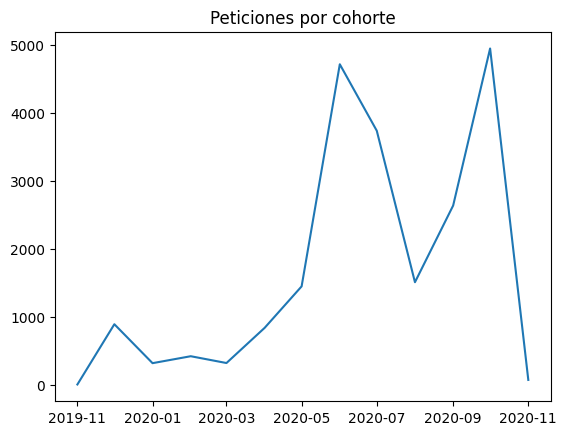

In [59]:
plt.title("Peticiones por cohorte")
plt.plot(num_ad)
plt.grid
plt.show()

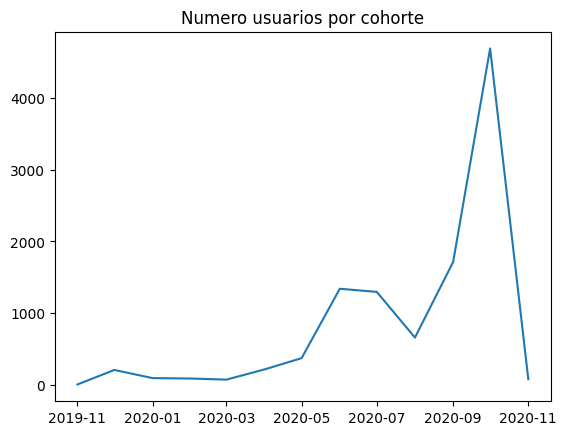

In [60]:
plt.title("Numero usuarios por cohorte")
plt.plot(num_users)
plt.show()

1. - En noviembre 2019 hay un solo usuario por lo que se elimina por falta de datos suficientes para evaluar el mes.
2. - En noviembre 2020 hay 75 usuarios que corresponden unicamente al 1/11, por lo que no es representativo del mes y no han tenido tiempo de hacer más solicitudes, por los que también los eliminaremos

In [61]:
filtro=(cash['cohorte'].dt.month!=11) # Eliminar 11/19 y 11/20
cash=cash[filtro]

In [62]:
cash["cohorte"].value_counts()

cohorte
2020-10-01    4943
2020-06-01    4711
2020-07-01    3735
2020-09-01    2636
2020-08-01    1510
2020-05-01    1449
2019-12-01     893
2020-04-01     840
2020-02-01     423
2020-03-01     323
2020-01-01     321
Name: count, dtype: int64

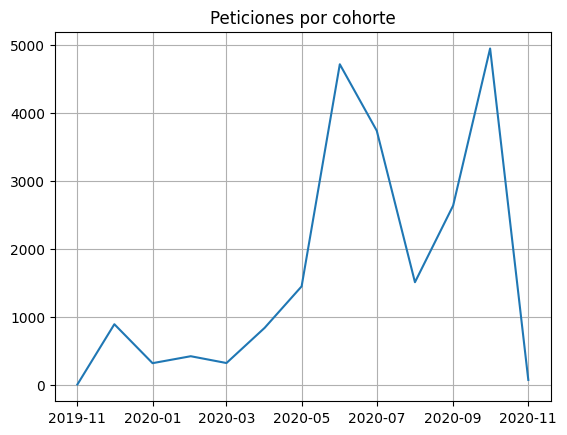

In [63]:
plt.title("Peticiones por cohorte")
plt.plot(num_ad)
plt.grid(True)
plt.show()

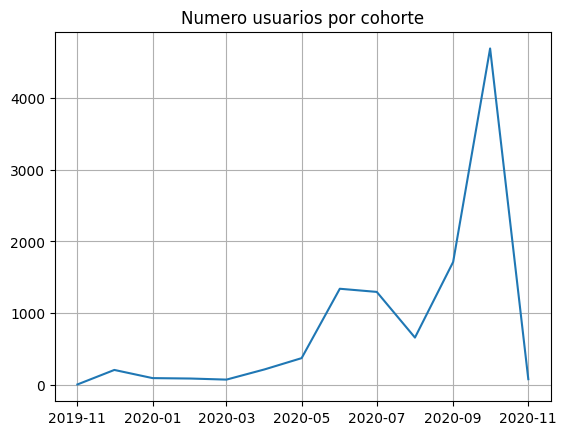

In [64]:
plt.title("Numero usuarios por cohorte")
plt.plot(num_users)
plt.grid(True)
plt.show()

In [65]:
cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                           0
moderated_at                   7682
deleted_account_id            21783
reimbursement_date                0
cash_request_received_date     6259
money_back_date                6021
transfer_type                     0
send_at                        6321
recovery_status               18657
reco_creation                 18657
reco_last_update              18657
created_at_moth                   0
month_created                     0
cohorte                           0
dtype: int64

In [66]:
cash.shape

(21784, 19)

In [67]:
cash["status"].value_counts()

status
money_back               15606
rejected                  5219
direct_debit_rejected      812
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                     6
Name: count, dtype: int64

In [68]:
cash[cash["status"]=='canceled']

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_at_moth,month_created,cohorte
6554,15648,100.0,canceled,2020-09-11 06:16:16.095653+00:00,2020-09-15 09:27:48.07616+00,10562.0,NaN,NaN,2020-10-05 22:00:00+00,NaN,NaN,instant,2020-09-18 06:16:16+00,NaN,NaN,NaN,9,2020-09-01,2020-06-01
6560,15813,100.0,canceled,2020-09-12 08:56:37.893879+00:00,2020-12-14 10:31:40.640514+00,10562.0,NaN,NaN,2020-10-31 23:00:00+00,NaN,2020-10-11 22:00:00+00,instant,2020-09-19 08:56:37+00,NaN,NaN,NaN,9,2020-09-01,2020-06-01
7530,10025,100.0,canceled,2020-07-29 13:59:55.699265+00:00,2020-08-06 14:39:06.402517+00,34206.0,2020-07-29 16:10:38+00,NaN,2020-08-27 22:00:00+00,NaN,NaN,regular,2020-08-05 13:59:55+00,NaN,NaN,NaN,7,2020-07-01,2020-07-01
9723,12838,100.0,canceled,2020-08-17 19:05:29.923785+00:00,2020-09-10 09:44:08.55202+00,35465.0,NaN,NaN,2020-08-31 19:05:42+00,NaN,NaN,instant,2020-08-24 19:05:29+00,NaN,NaN,NaN,8,2020-08-01,2020-08-01
10125,14213,100.0,canceled,2020-09-01 15:47:29.927057+00:00,2020-09-15 09:28:53.497986+00,27426.0,2020-09-01 17:22:40+00,NaN,2020-09-15 15:48:02+00,2020-09-04,NaN,regular,2020-09-08 15:47:29+00,NaN,NaN,NaN,9,2020-09-01,2020-07-01
11639,21353,100.0,canceled,2020-10-15 15:46:59.594932+00:00,2020-10-27 14:21:01.441286+00,71015.0,NaN,NaN,2020-10-25 11:00:00+00,NaN,NaN,instant,2020-10-17 11:03:32+00,NaN,NaN,NaN,10,2020-10-01,2020-10-01


In [69]:
cash.groupby("cohorte") ['status'].value_counts()

#fees[fees["status"]=='cancelled']

cohorte     status               
2019-12-01  money_back                611
            rejected                  240
            direct_debit_rejected      39
            direct_debit_sent           2
            transaction_declined        1
2020-01-01  money_back                207
            rejected                  103
            direct_debit_rejected      11
2020-02-01  money_back                336
            rejected                   77
            direct_debit_rejected       8
            transaction_declined        1
            active                      1
2020-03-01  money_back                248
            rejected                   69
            direct_debit_rejected       4
            active                      1
            direct_debit_sent           1
2020-04-01  money_back                593
            rejected                  212
            direct_debit_rejected      34
            direct_debit_sent           1
2020-05-01  money_back               1096


In [70]:
cash.groupby("cohorte") ['transfer_type'].value_counts()

cohorte     transfer_type
2019-12-01  regular           733
            instant           160
2020-01-01  regular           261
            instant            60
2020-02-01  regular           341
            instant            82
2020-03-01  regular           250
            instant            73
2020-04-01  regular           648
            instant           192
2020-05-01  regular          1005
            instant           444
2020-06-01  regular          2919
            instant          1792
2020-07-01  instant          1871
            regular          1864
2020-08-01  instant          1200
            regular           310
2020-09-01  instant          2426
            regular           210
2020-10-01  instant          4702
            regular           241
Name: count, dtype: int64

In [71]:
# buscar num peticiones / usuario / mes y comparar comportamientos entre cohortes
# div  peticiones /ususarios --> para cada cohorte
# div ratio por (mes_fin oct20- mes alta de cohorte) --> ratio pet/usuario/mes

ratio1=cash.groupby("cohorte") ['id'].count()
ratio2=cash.groupby("cohorte") ["user_id"].nunique()
ratio=ratio1 /ratio2
ratio

cohorte
2019-12-01    4.377451
2020-01-01    3.566667
2020-02-01    5.035714
2020-03-01    4.681159
2020-04-01    3.962264
2020-05-01    3.926829
2020-06-01    3.520927
2020-07-01    2.886399
2020-08-01    2.301829
2020-09-01    1.539720
2020-10-01    1.053046
dtype: float64

In [72]:
num_meses=[11,10,9,8,7,6,5,4,3,2,1]
ratio_mes = list( zip(ratio,num_meses))
ratio_mes

[(4.377450980392157, 11),
 (3.566666666666667, 10),
 (5.035714285714286, 9),
 (4.681159420289855, 8),
 (3.9622641509433962, 7),
 (3.926829268292683, 6),
 (3.5209267563527655, 5),
 (2.8863987635239567, 4),
 (2.301829268292683, 3),
 (1.5397196261682242, 2),
 (1.0530464422667234, 1)]

In [73]:
ratiom= [x[0]/x[1] for x in ratio_mes ]  # peticiones mes de cada cohorte
ratiom

[0.39795008912655977,
 0.3566666666666667,
 0.5595238095238095,
 0.5851449275362319,
 0.5660377358490566,
 0.6544715447154471,
 0.7041853512705532,
 0.7215996908809892,
 0.7672764227642276,
 0.7698598130841121,
 1.0530464422667234]

In [74]:
dic_ratio={ 'cohorte': cash["cohorte"].sort_values().unique(),
          'ratio':ratiom }
df_ratio=pd.DataFrame(dic_ratio)
df_ratio

,cohorte,ratio
0,2019-12-01,0.397950
1,2020-01-01,0.356667
2,2020-02-01,0.559524
3,2020-03-01,0.585145
4,2020-04-01,0.566038
5,2020-05-01,0.654472
6,2020-06-01,0.704185
7,2020-07-01,0.721600
8,2020-08-01,0.767276
9,2020-09-01,0.769860


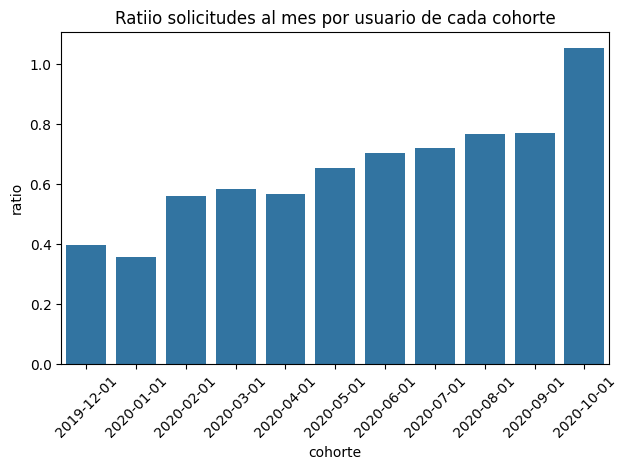

In [75]:
# Preg 1 1. **Frecuencia de Uso del Servicio:**
#Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
sns.barplot( x='cohorte', y='ratio' ,data=df_ratio )
plt.title("Ratiio solicitudes al mes por usuario de cada cohorte")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
# Unir dataframe para ver ingresos Generados por la Cohorte

s_cash= cash[["id","cohorte"]]  # Seleccionamos columnas

s_cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21784 entries, 0 to 21866
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       21784 non-null  int64         
 1   cohorte  21784 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 510.6 KB


In [77]:
s_fees= fees[["cash_request_id","total_amount",'type',"status"]] # Seleccionamos columnas
s_fees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21060 entries, 0 to 21060
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21060 non-null  object 
 1   total_amount     21060 non-null  float64
 2   type             21060 non-null  object 
 3   status           21060 non-null  object 
dtypes: float64(1), object(3)
memory usage: 822.7+ KB


In [78]:
s_fees["cash_request_id"]= s_fees["cash_request_id"].astype(int)  # convertir a integer el id porque el id en cash es integer  y se ha de hacer merge
s_fees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21060 entries, 0 to 21060
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21060 non-null  int64  
 1   total_amount     21060 non-null  float64
 2   type             21060 non-null  object 
 3   status           21060 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 822.7+ KB


<ipython-input-78-d2d62794750d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_fees["cash_request_id"]= s_fees["cash_request_id"].astype(int)  # convertir a integer el id porque el id en cash es integer  y se ha de hacer merge


In [79]:
df=pd.merge(left=s_cash,right=s_fees,left_on='id',right_on='cash_request_id') #juntar los dos dfs
df


,id,cohorte,cash_request_id,total_amount,type,status
0,2933,2019-12-01,2933,5.0,postpone,accepted
1,19968,2019-12-01,19968,5.0,instant_payment,accepted
2,14484,2019-12-01,14484,5.0,instant_payment,accepted
3,7391,2020-05-01,7391,5.0,postpone,cancelled
4,11771,2020-05-01,11771,5.0,instant_payment,accepted
...,...,...,...,...,...,...
20069,7930,2020-07-01,7930,5.0,incident,accepted
20070,22357,2020-10-01,22357,5.0,postpone,accepted
20071,22357,2020-10-01,22357,5.0,instant_payment,accepted
20072,20256,2020-10-01,20256,5.0,postpone,accepted


In [80]:
# filtramos por status accepted para coger los que se han cobrado

df_accepted= df[ df["status"] =='accepted']
df_accepted["status"].value_counts()

status
accepted    14255
Name: count, dtype: int64

In [81]:
df_accepted["type"].value_counts()

type
instant_payment    9981
postpone           2863
incident           1411
Name: count, dtype: int64

In [82]:
df_accepted.groupby(["cohorte"])["total_amount"].sum()

cohorte
2019-12-01     1055.0
2020-01-01      485.0
2020-02-01      635.0
2020-03-01      605.0
2020-04-01     1495.0
2020-05-01     3600.0
2020-06-01    13435.0
2020-07-01    10640.0
2020-08-01     4980.0
2020-09-01    11165.0
2020-10-01    23180.0
Name: total_amount, dtype: float64

In [83]:
#sns.countplot(data=df,x="cohorte")

In [84]:
dfin=df_accepted.groupby(["cohorte"])["total_amount"].sum().reset_index()
dfin

,cohorte,total_amount
0,2019-12-01,1055.0
1,2020-01-01,485.0
2,2020-02-01,635.0
3,2020-03-01,605.0
4,2020-04-01,1495.0
5,2020-05-01,3600.0
6,2020-06-01,13435.0
7,2020-07-01,10640.0
8,2020-08-01,4980.0
9,2020-09-01,11165.0


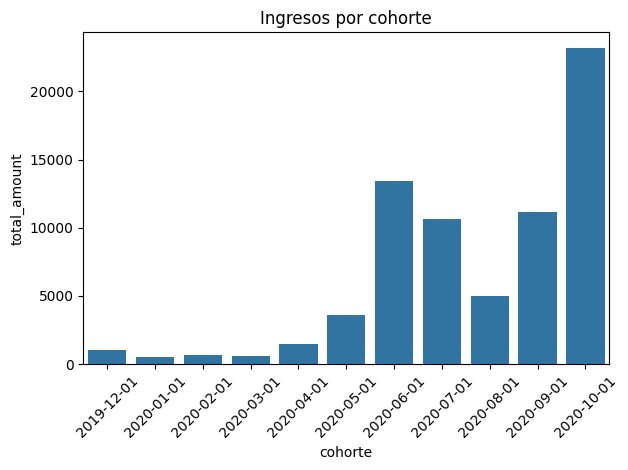

In [85]:
#ns.barplot( x='cohorte', y='total_amount' ,data=df.groupby(["cohorte"])["total_amount"].sum() )
sns.barplot( x='cohorte', y='total_amount' ,data=dfin )
plt.title("Ingresos por cohorte")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
dfingtipo=df_accepted.groupby(["cohorte","type"])["total_amount"].sum().reset_index()
dfingtipo

,cohorte,type,total_amount
0,2019-12-01,incident,150.0
1,2019-12-01,instant_payment,615.0
2,2019-12-01,postpone,290.0
3,2020-01-01,incident,70.0
4,2020-01-01,instant_payment,255.0
5,2020-01-01,postpone,160.0
6,2020-02-01,incident,90.0
7,2020-02-01,instant_payment,365.0
8,2020-02-01,postpone,180.0
9,2020-03-01,incident,120.0


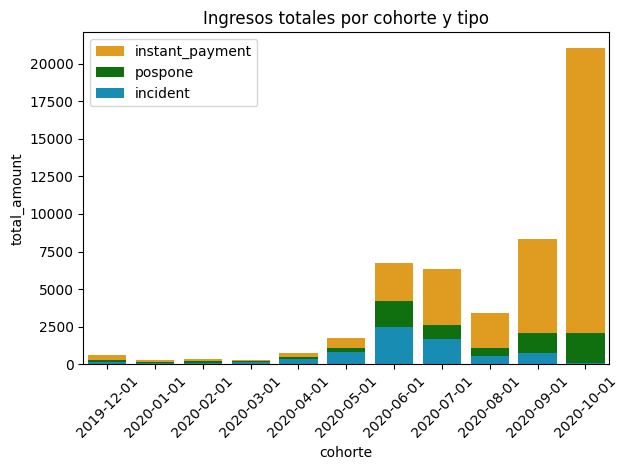

In [87]:

inc=dfingtipo[dfingtipo['type']=='incident']
in_pay=dfingtipo[dfingtipo['type']=='instant_payment']
pos=dfingtipo[dfingtipo['type']=='postpone']

bar1 = sns.barplot(x="cohorte",  y="total_amount", data=in_pay, label="instant_payment" , color="orange")
bar2 = sns.barplot(x="cohorte",  y="total_amount", data=pos, label="pospone",color="green" )
bar3 = sns.barplot(x="cohorte",  y="total_amount", data=inc, label="incident", color="#0099cc")


plt.legend()
plt.title("Ingresos totales por cohorte y tipo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

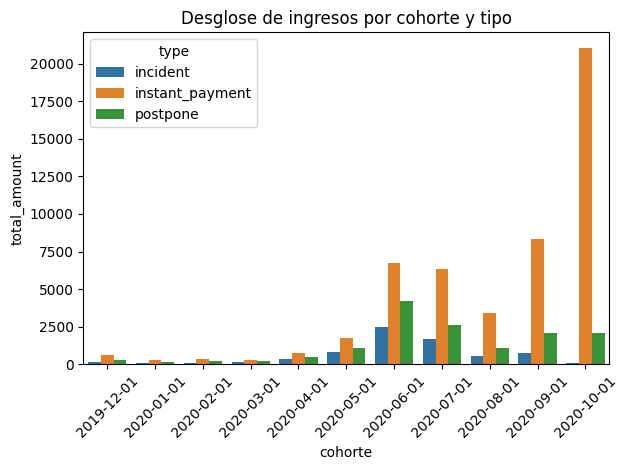

In [88]:
sns.barplot( x='cohorte', y='total_amount',hue="type" ,data=dfingtipo )
plt.title("Desglose de ingresos por cohorte y tipo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
df.groupby(["cohorte","type"])["total_amount"].sum()

cohorte     type           
2019-12-01  incident             210.0
            instant_payment      625.0
            postpone             630.0
2020-01-01  incident             105.0
            instant_payment      265.0
            postpone             315.0
2020-02-01  incident             120.0
            instant_payment      380.0
            postpone             465.0
2020-03-01  incident             145.0
            instant_payment      310.0
            postpone             350.0
2020-04-01  incident             565.0
            instant_payment      775.0
            postpone            1025.0
2020-05-01  incident            1020.0
            instant_payment     1790.0
            postpone            2470.0
2020-06-01  incident            3485.0
            instant_payment     7160.0
            postpone           10045.0
2020-07-01  incident            2710.0
            instant_payment     6805.0
            postpone            6855.0
2020-08-01  incident             725

In [90]:
df

,id,cohorte,cash_request_id,total_amount,type,status
0,2933,2019-12-01,2933,5.0,postpone,accepted
1,19968,2019-12-01,19968,5.0,instant_payment,accepted
2,14484,2019-12-01,14484,5.0,instant_payment,accepted
3,7391,2020-05-01,7391,5.0,postpone,cancelled
4,11771,2020-05-01,11771,5.0,instant_payment,accepted
...,...,...,...,...,...,...
20069,7930,2020-07-01,7930,5.0,incident,accepted
20070,22357,2020-10-01,22357,5.0,postpone,accepted
20071,22357,2020-10-01,22357,5.0,instant_payment,accepted
20072,20256,2020-10-01,20256,5.0,postpone,accepted


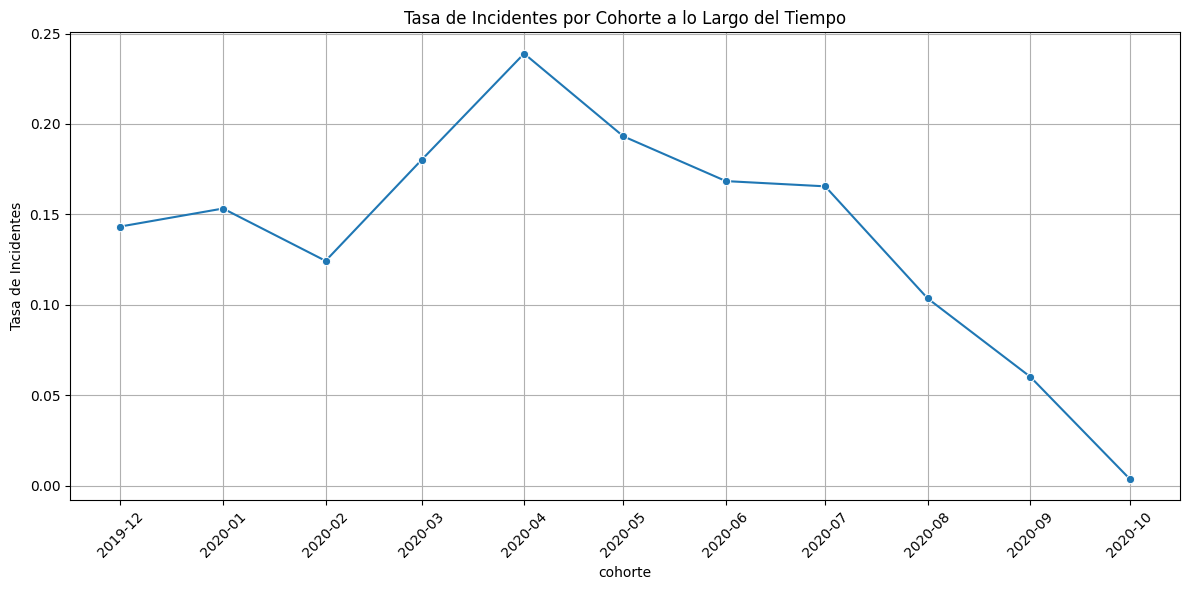

In [91]:
# Calcular el número de incidentes por cohorte
incident_df = df[df['type'] == 'incident']
incident_count_per_cohorte = incident_df['cohorte'].value_counts().sort_index()
total_requests_per_cohorte = df['cohorte'].value_counts().sort_index()
# incidentes / total de solicitudes por cohorte
incident_rate_per_cohorte = incident_count_per_cohorte / total_requests_per_cohorte
incident_rate_per_cohorte.reset_index().rename(columns={'index': 'cohorte', 'count': 'Tasa de Incidentes'})

incident_rate_df = incident_rate_per_cohorte.reset_index() # Conversión a df
incident_rate_df.rename(columns={'index': 'cohorte', 'count': 'Tasa de Incidentes'}, inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=incident_rate_df, x='cohorte', y='Tasa de Incidentes', marker='o')
plt.title('Tasa de Incidentes por Cohorte a lo Largo del Tiempo')
plt.xlabel('cohorte')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

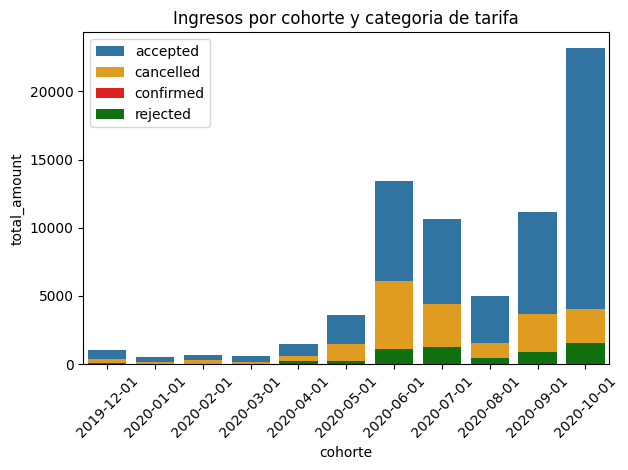

In [92]:
dfingstatus=df.groupby(["cohorte","status"])["total_amount"].sum().reset_index()

acc=dfingstatus[dfingstatus['status']=='accepted']
can=dfingstatus[dfingstatus['status']=='cancelled']
con=dfingstatus[dfingstatus['status']=='confirmed']
rej=dfingstatus[dfingstatus['status']=='rejected']

bar1 = sns.barplot(x="cohorte",  y="total_amount", data=acc, label="accepted" )
bar2 = sns.barplot(x="cohorte",  y="total_amount", data=can, label="cancelled" , color="orange")
bar3 = sns.barplot(x="cohorte",  y="total_amount", data=con, label="confirmed", color="red")
bar4 = sns.barplot(x="cohorte",  y="total_amount", data=rej, label="rejected", color="green")
#sns.barplot( x='cohorte', y=acc ,data=dfingstatus)
plt.legend()
plt.title("Ingresos por cohorte y categoria de tarifa")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

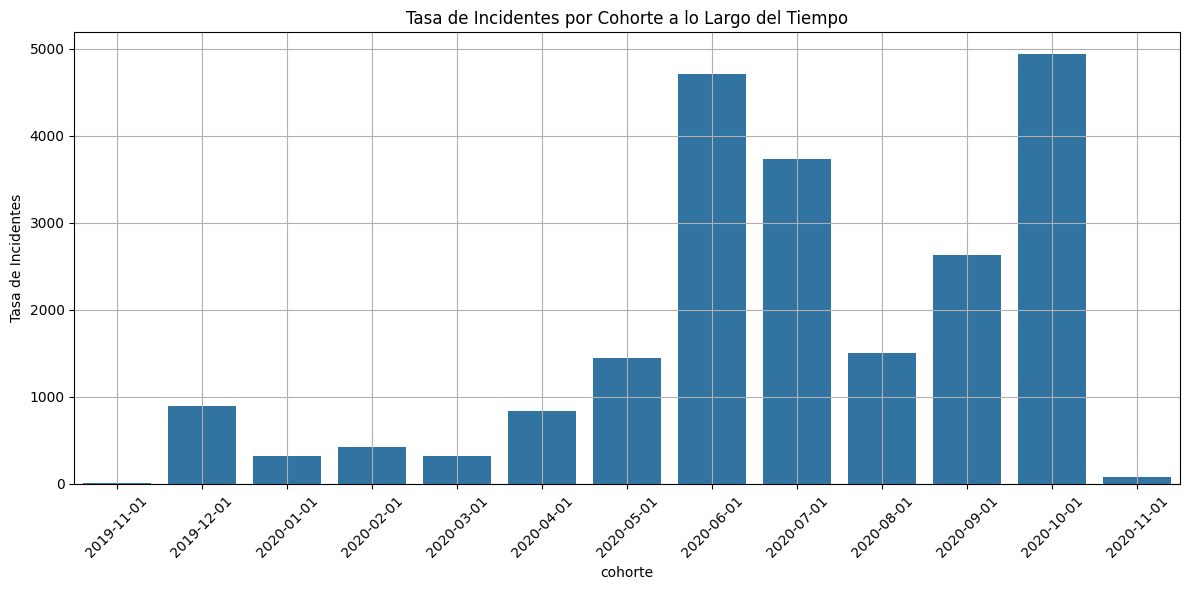

In [93]:
# TODO En

# Calcular el número de incidentes por cohorte
incident_df = df[df['type'] == 'incident']
incident_count_per_cohorte = incident_df['cohorte'].value_counts().sort_index()
total_requests_per_cohorte = df['cohorte'].value_counts().sort_index()
# incidentes / total de solicitudes por cohorte
incident_rate_per_cohorte = incident_count_per_cohorte / total_requests_per_cohorte
incident_rate_per_cohorte.reset_index().rename(columns={'index': 'cohorte', 'count': 'Tasa de Incidentes'})


incident_rate_df = incident_rate_per_cohorte.reset_index() # Conversión a df
incident_rate_df.rename(columns={'index': 'cohorte', 'count': 'Tasa de Incidentes'}, inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=incident_rate_df, x='cohorte', y='Tasa de Incidentes', marker='o')
sns.barplot  (num_ad)


plt.title('Tasa de Incidentes por Cohorte a lo Largo del Tiempo')
plt.xlabel('cohorte')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

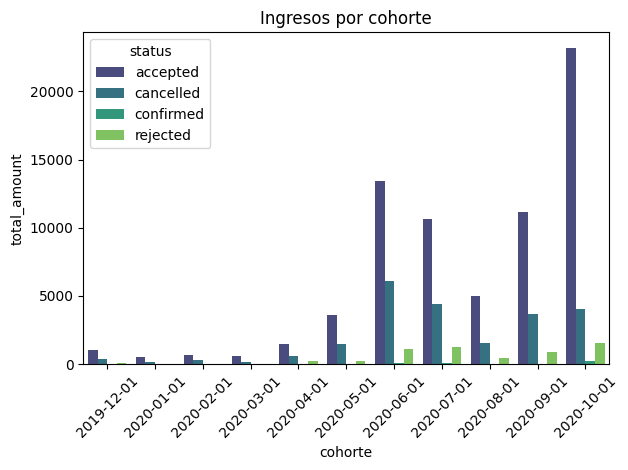

In [94]:
dfingstatus=df.groupby(["cohorte","status"])["total_amount"].sum().reset_index()


sns.barplot( x='cohorte', y='total_amount',hue="status" ,data=dfingstatus, palette = "viridis" )
#sns.barplot( x='cohorte', y='total_amount' ,data=dfingstatus, palette = "viridis" )[
#sns.barplot( x='cohorte', y='status',data=dfingstatus, palette = "viridis" )]

#plt.bar(dfingstatus['cohorte'], dfingstatus['total_amount'])
#plt.bar('cohorte', 'status' , bottom = 'total_amount' )
#,data=dfingstatus
plt.title("Ingresos por cohorte")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [95]:
fees["reason"].str[:20].value_counts()
fees["reason"].str[:20].value_counts().reset_index()

,reason,count
0,Instant Payment Cash,11098
1,Postpone Cash Reques,7766
2,rejected direct debi,1599
3,month delay on payme,597


<ipython-input-96-4bd07951d2d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='reason', y='count',data=dfreason, palette = "viridis" )


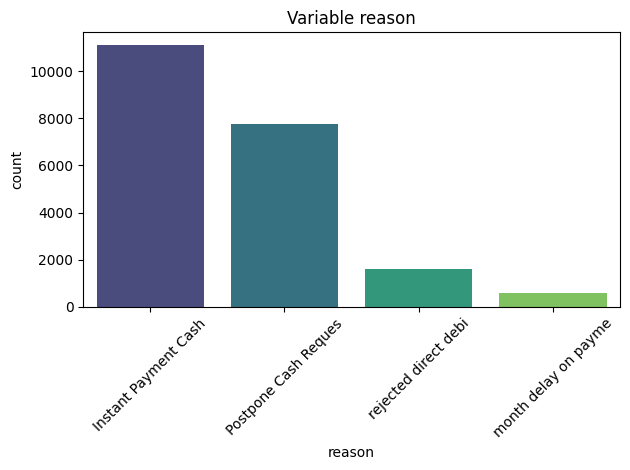

In [96]:
dfreason=fees["reason"].str[:20].value_counts().reset_index()
sns.barplot( x='reason', y='count',data=dfreason, palette = "viridis" )
plt.title("Variable reason")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
cash["status"].value_counts()

status
money_back               15606
rejected                  5219
direct_debit_rejected      812
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                     6
Name: count, dtype: int64

Agrupamos por tipo de status:

Completadas:
- approved
- money sent
- active
- money_back
- direct_debit_sent

Rechazadas:
- Rejected
- Transaction_declined
- Canceled
- Direct_debit_rejected

Pendientes:
- Pending
- Waiting_user_confirmation
- waiting_reimbursement


In [98]:

new_status={
  'money_back':'Completadas',
  'rejected':'Rechazadas',
  'direct_debit_rejected':'Rechazadas',
  'active':'Completadas',
  'transaction_declined':'Rechazadas',
  'direct_debit_sent':'Completadas',
  'canceled': 'Rechazadas'
}
new_status

{'money_back': 'Completadas',
 'rejected': 'Rechazadas',
 'direct_debit_rejected': 'Rechazadas',
 'active': 'Completadas',
 'transaction_declined': 'Rechazadas',
 'direct_debit_sent': 'Completadas',
 'canceled': 'Rechazadas'}

In [99]:
cash["status"] = cash["status"].apply(lambda x : new_status[x])

cash["status"]

<ipython-input-99-a579fcad48b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash["status"] = cash["status"].apply(lambda x : new_status[x])


0         Rechazadas
1         Rechazadas
2         Rechazadas
3        Completadas
4        Completadas
            ...     
21861    Completadas
21862    Completadas
21864    Completadas
21865    Completadas
21866    Completadas
Name: status, Length: 21784, dtype: object

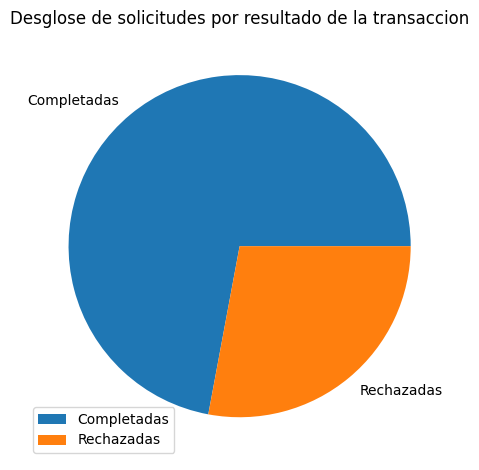

In [100]:
plt.pie (cash["status"].value_counts(),labels=cash["status"].value_counts().index)
plt.title("Desglose de solicitudes por resultado de la transaccion")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [101]:
dfst=cash.groupby(["cohorte","status"])["id"].count().reset_index()
dfst

,cohorte,status,id
0,2019-12-01,Completadas,613
1,2019-12-01,Rechazadas,280
2,2020-01-01,Completadas,207
3,2020-01-01,Rechazadas,114
4,2020-02-01,Completadas,337
5,2020-02-01,Rechazadas,86
6,2020-03-01,Completadas,250
7,2020-03-01,Rechazadas,73
8,2020-04-01,Completadas,594
9,2020-04-01,Rechazadas,246


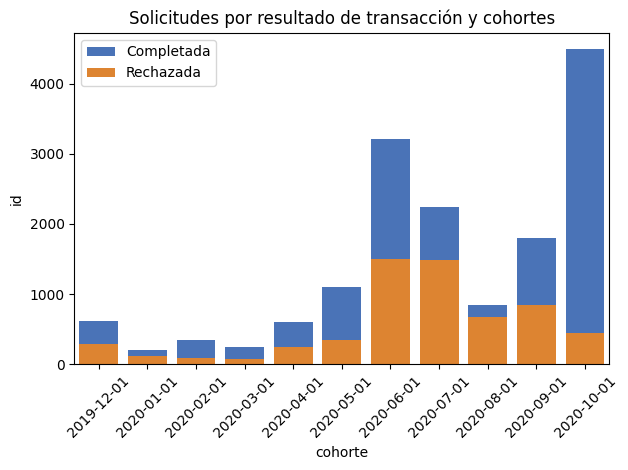

In [102]:

dfst=cash.groupby(["cohorte","status"])["id"].count().reset_index()
com=dfst[dfst['status']=='Completadas']
rec=dfst[dfst['status']=='Rechazadas']


bar1 = sns.barplot(x="cohorte",y="id" ,  data=com, label="Completada",color="#386ec9")
bar2 = sns.barplot(x="cohorte", y="id" ,   data=rec, label="Rechazada" ,  color="#fa8314" )

plt.title("Solicitudes por resultado de transacción y cohortes")

plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
com["id"].sum()

15699

In [104]:
rec["id"].sum()

6085

In [105]:
dfst.groupby(["status"]).value_counts()

status       cohorte     id  
Completadas  2019-12-01  613     1
             2020-01-01  207     1
             2020-10-01  4504    1
             2020-09-01  1797    1
             2020-08-01  838     1
             2020-07-01  2247    1
             2020-06-01  3213    1
             2020-05-01  1099    1
             2020-04-01  594     1
             2020-03-01  250     1
             2020-02-01  337     1
Rechazadas   2020-09-01  839     1
             2020-08-01  672     1
             2020-07-01  1488    1
             2020-06-01  1498    1
             2020-05-01  350     1
             2020-04-01  246     1
             2020-03-01  73      1
             2020-02-01  86      1
             2020-01-01  114     1
             2019-12-01  280     1
             2020-10-01  439     1
Name: count, dtype: int64